In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
dfd=pd.read_excel('covid data/covid_19_deaths.xlsx')
dfr=pd.read_excel('covid data/covid_19_recovered.xlsx')
dfc=pd.read_excel('covid data/covid_19_confirmed.xlsx')

# data exploration and handling the missing values and and data transformation

In [3]:
dfc.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [4]:
# melting the data frame 

dfc_melt=dfc.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Confirmed cases')
dfc_melt

,Province/State,Country/Region,Lat,Long,Date,Confirmed cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
136339,NaN,Vietnam,14.058324,108.277199,5/29/21,6908
136340,NaN,West Bank and Gaza,31.952200,35.233200,5/29/21,307838
136341,NaN,Yemen,15.552727,48.516388,5/29/21,6731
136342,NaN,Zambia,-13.133897,27.849332,5/29/21,94751


In [5]:
dfc_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Province/State   42484 non-null   object 
 1   Country/Region   136344 non-null  object 
 2   Lat              135356 non-null  float64
 3   Long             135356 non-null  float64
 4   Date             136344 non-null  object 
 5   Confirmed cases  136344 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.2+ MB


In [6]:
# changing the data type of date

dfc_melt['Date']=pd.to_datetime(dfc_melt['Date'])

In [7]:
dfc_melt.isnull().sum()/dfc_melt.shape[0]

Province/State     0.688406
Country/Region     0.000000
Lat                0.007246
Long               0.007246
Date               0.000000
Confirmed cases    0.000000
dtype: float64

In [8]:
# filling the missing values in province state.

dfc_melt['Province/State'].fillna(dfc_melt['Country/Region'],inplace=True)

In [9]:
dfc_melt.isnull().sum()

Province/State       0
Country/Region       0
Lat                988
Long               988
Date                 0
Confirmed cases      0
dtype: int64

In [10]:
# there is missing values in lat long columns.we lev it as it is.

# perfrming the same steps in other columns

In [11]:
dfd.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [12]:
# melting the dfd dataframe

dfd_melt=dfd.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Death cases')
dfd_melt

,Province/State,Country/Region,Lat,Long,Date,Death cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0.0
...,...,...,...,...,...,...
136339,NaN,Vietnam,14.058324,108.277199,5/29/21,47.0
136340,NaN,West Bank and Gaza,31.952200,35.233200,5/29/21,3492.0
136341,NaN,Yemen,15.552727,48.516388,5/29/21,1319.0
136342,NaN,Zambia,-13.133897,27.849332,5/29/21,1276.0


In [13]:
dfd_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136344 entries, 0 to 136343
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  42484 non-null   object 
 1   Country/Region  136344 non-null  object 
 2   Lat             135356 non-null  float64
 3   Long            135356 non-null  float64
 4   Date            136344 non-null  object 
 5   Death cases     136343 non-null  float64
dtypes: float64(3), object(3)
memory usage: 6.2+ MB


In [14]:
# change the data type of date column
dfd_melt['Date']=pd.to_datetime(dfd_melt['Date'])

In [15]:
# fill the missing values of the province columns

dfd_melt['Province/State'].fillna(dfd_melt['Country/Region'],inplace=True)

In [16]:
dfc_melt.isnull().sum()
# missing values in lat,long will lev it as it is.

Province/State       0
Country/Region       0
Lat                988
Long               988
Date                 0
Confirmed cases      0
dtype: int64

In [17]:
# dfr

In [18]:
dfr.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


In [19]:
dfr_melt=dfr.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Recovered cases')
dfr_melt

,Province/State,Country/Region,Lat,Long,Date,Recovered cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0.0
...,...,...,...,...,...,...
128929,NaN,Vietnam,14.058324,108.277199,5/29/21,2896.0
128930,NaN,West Bank and Gaza,31.952200,35.233200,5/29/21,300524.0
128931,NaN,Yemen,15.552727,48.516388,5/29/21,3399.0
128932,NaN,Zambia,-13.133897,27.849332,5/29/21,91594.0


In [20]:
dfr_melt.isnull().sum()/dfr_melt.shape[0]

Province/State     0.731801
Country/Region     0.000000
Lat                0.003831
Long               0.003831
Date               0.000000
Recovered cases    0.000008
dtype: float64

In [21]:
dfr_melt['Province/State'].fillna(dfr_melt['Country/Region'],inplace=True)
# filled the missing values

In [22]:
# change the data type of date

dfr_melt['Date']=pd.to_datetime(dfr_melt['Date'])

In [23]:
dfr_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128934 entries, 0 to 128933
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Province/State   128934 non-null  object        
 1   Country/Region   128934 non-null  object        
 2   Lat              128440 non-null  float64       
 3   Long             128440 non-null  float64       
 4   Date             128934 non-null  datetime64[ns]
 5   Recovered cases  128933 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 5.9+ MB


# independent data analysis

In [24]:
dfc_melt.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed cases
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0
1,Albania,Albania,41.15330,20.168300,2020-01-22,0
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0


['US', 'India', 'Brazil']

,Date,Confirmed cases,Country/Region
30,2020-01-22,0,Brazil
147,2020-01-22,0,India
251,2020-01-22,1,US
306,2020-01-23,0,Brazil
423,2020-01-23,0,India
...,...,...,...
135939,2021-05-28,27729247,India
136043,2021-05-28,33239963,US
136098,2021-05-29,16471600,Brazil
136215,2021-05-29,27894800,India


<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Date', ylabel='Confirmed cases'>

(array([18262., 18353., 18444., 18536., 18628., 18718., 18809., 18901.,
        18993.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01')])

Text(0.5, 1.0, 'confirmed cases over time for top countries')

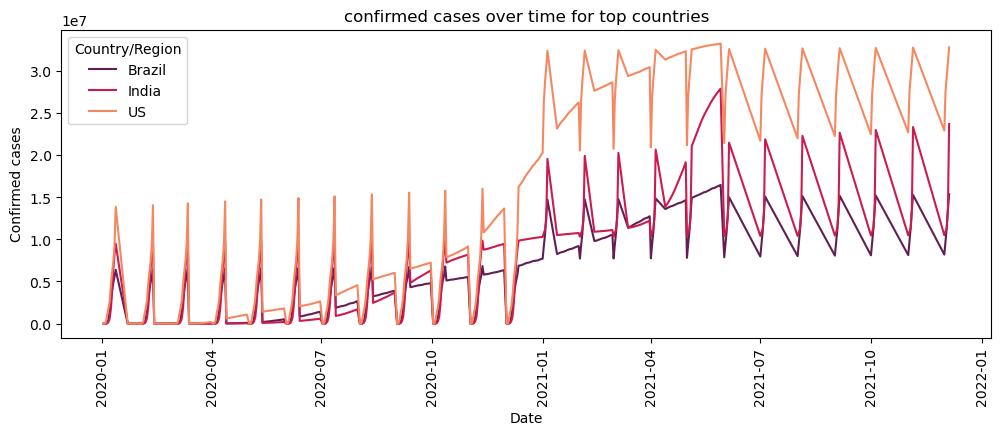

In [25]:
# generate plot of confirmed cases over time for top countries.

top_country=dfc_melt.groupby('Country/Region')['Confirmed cases'].sum().sort_values(ascending=False)[0:3].index.tolist()
top_country

top_3=dfc_melt.loc[dfc_melt['Country/Region'].isin(top_country),['Date','Confirmed cases','Country/Region']]
top_3

# plotting
plt.figure(figsize=(12,4))
sns.lineplot(x='Date',y='Confirmed cases',data=top_3,hue='Country/Region',palette='rocket')
plt.xticks(rotation=(90))
plt.title('confirmed cases over time for top countries')
plt.show()

,Province/State,Country/Region,Lat,Long,Date,Confirmed cases
58,Anhui,China,31.8257,117.2264,2020-01-22,1
59,Beijing,China,40.1824,116.4142,2020-01-22,14
60,Chongqing,China,30.0572,107.8740,2020-01-22,6
61,Fujian,China,26.0789,117.9874,2020-01-22,1
62,Gansu,China,35.7518,104.2861,2020-01-22,0
...,...,...,...,...,...,...
136155,Tibet,China,31.6927,88.0924,2021-05-29,1
136156,Unknown,China,NaN,NaN,2021-05-29,0
136157,Xinjiang,China,41.1129,85.2401,2021-05-29,980
136158,Yunnan,China,24.9740,101.4870,2021-05-29,352


Date
2020-01-02     11891
2020-01-03     79932
2020-01-04     82361
2020-01-05     83959
2020-01-06     84154
               ...  
2021-12-01     97095
2021-12-02    100559
2021-12-03    101292
2021-12-04    102078
2021-12-05    102671
Name: Confirmed cases, Length: 494, dtype: int64

<Axes: xlabel='Date'>

Text(0.5, 1.0, 'confirmed cases over time for china')

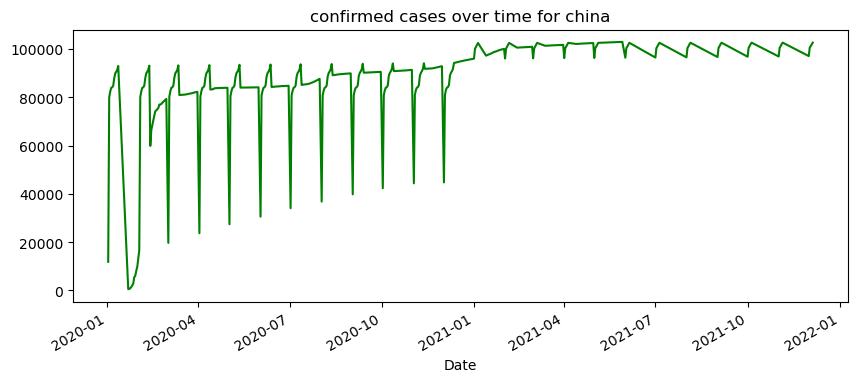

In [26]:
# generate plot of confirmed cases over time for china.

china=dfc_melt.loc[dfc_melt['Country/Region']=='China']
china

china_group=china.groupby('Date')['Confirmed cases'].sum()
china_group

# plotting
china_group.plot.line(figsize=(10,4),color='g',linestyle='-')
plt.title('confirmed cases over time for china')

In [36]:
# daily new cases in germany france and italy

# daily new cases in germany
daily_germany=dfc_melt.loc[dfc_melt['Country/Region']=='Germany',['Confirmed cases']].diff()
# daily_germany

# daily new cases in france
daily_france=dfc_melt.loc[dfc_melt['Country/Region']=='France',['Confirmed cases']].diff()
# daily_france

# daily new cases for italy

daily_italy=dfc_melt.loc[dfc_melt['Country/Region']=='Italy',['Confirmed cases']].diff()
# daily_italy

# there is negative value in the data replace it with zero
(daily_germany<0).sum()
daily_germany[daily_germany<0]=0

(daily_france<0).sum()
daily_france[daily_france<0]=0

(daily_italy<0).sum()
daily_italy[daily_italy<0]=0

daily_germany.columns=['Daily cases']
daily_germany
daily_france.columns=['Daily cases']
daily_france
daily_italy.columns=['Daily cases']
daily_italy

Confirmed cases    0
dtype: int64

Confirmed cases    3135
dtype: int64

Confirmed cases    1
dtype: int64

,Daily cases
134,NaN
410,0.0
686,0.0
962,0.0
1238,0.0
...,...
135098,2578.0
135374,4473.0
135650,6949.0
135926,6169.0


,Daily cases
119,NaN
120,0.0
121,0.0
122,0.0
123,0.0
...,...
136194,0.0
136195,0.0
136196,1890.0
136197,0.0


,Daily cases
153,NaN
429,0.0
705,0.0
981,0.0
1257,0.0
...,...
135117,3220.0
135393,3935.0
135669,4143.0
135945,3737.0


<Axes: >

Text(0.5, 1.0, 'Germany daily new cases')

<Axes: >

Text(0.5, 1.0, 'France daily new cases')

<Axes: >

Text(0.5, 1.0, 'italy daily new cases')

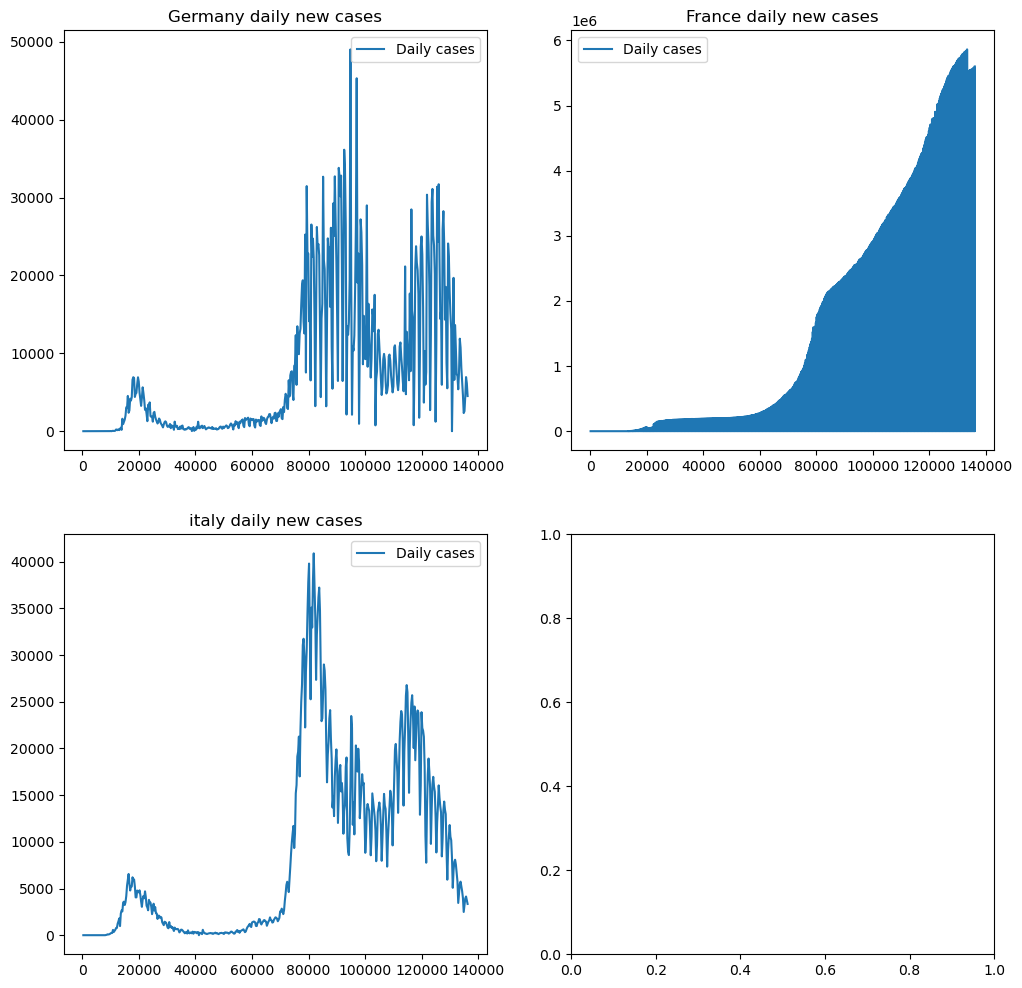

In [37]:
# plotting
fig,ax=plt.subplots(2,2,figsize=(12,12))

# germany
daily_germany.plot.line(ax=ax[0][0])
ax[0][0].set_title('Germany daily new cases')


# france
daily_france.plot.line(ax=ax[0][1])
ax[0][1].set_title('France daily new cases')

# italy
daily_italy.plot.line(ax=ax[1][0])
ax[1][0].set_title('italy daily new cases')

In [88]:
# analyze peak no of daily cases in germany france and italy,what is the heighest single day surge and when did it occur?

# daily new cases in 
germany=dfc_melt.loc[dfc_melt['Country/Region']=='Germany',['Date','Confirmed cases']]
germany.index=germany['Date']
germany.drop(['Date'],axis=1,inplace=True)
germany=germany.diff()
germany.columns=['germany daily cases']
germany

# france daily new cases
france=dfc_melt.loc[dfc_melt['Country/Region']=='France',['Date','Confirmed cases']]
france.index=france['Date']
france.drop(['Date'],axis=1,inplace=True)
france=france.diff()
france.columns=['france daily cases']
france

italy_cases=dfc_melt.loc[dfc_melt['Country/Region']=='Italy',['Date','Confirmed cases']]
italy_cases.index=italy_cases['Date']
italy_cases.drop(['Date'],axis=1,inplace=True)
italy_cases=italy_cases.diff()
italy_cases.columns=['italy daily cases']
italy_cases

# their are negative values in the table replace it with 0

(germany<0).sum()
germany[germany<0]=0

(france<0).sum()
france[france<0]=0

(italy_cases<0).sum()
italy_cases[italy_cases<0]=0

,germany daily cases
Date,
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2021-05-25,2578.0
2021-05-26,4473.0
2021-05-27,6949.0


,france daily cases
Date,
2020-01-22,NaN
2020-01-22,0.0
2020-01-22,0.0
2020-01-22,0.0
2020-01-22,0.0
...,...
2021-05-29,-23896.0
2021-05-29,-980.0
2021-05-29,1890.0


,italy daily cases
Date,
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2021-05-25,3220.0
2021-05-26,3935.0
2021-05-27,4143.0


germany daily cases    0
dtype: int64

france daily cases    3135
dtype: int64

italy daily cases    1
dtype: int64

In [112]:
# analysing peak cases in all the 3 countries and when did it occur
germany.idxmax()
germany.max()

france.idxmax()
france.max()

italy_cases.idxmax()
italy_cases.max()

germany daily cases   2020-12-30
dtype: datetime64[ns]

germany daily cases    49044.0
dtype: float64

france daily cases   2021-05-19
dtype: datetime64[ns]

france daily cases    5862693.0
dtype: float64

italy daily cases   2020-11-13
dtype: datetime64[ns]

italy daily cases    40902.0
dtype: float64

In [125]:
# analyse the recovery rate between canada and australia.

canada=dfc_melt.loc[dfc_melt['Country/Region']=='Canada']
canada_group=canada.groupby('Date')['Confirmed cases'].sum()
canada_group=pd.DataFrame(canada_group)
canada_group

canada=dfr_melt.loc[dfr_melt['Country/Region']=='Canada']
canada_recovered=canada.groupby('Date')['Recovered cases'].sum()
canada_recovered=pd.DataFrame(canada_recovered)
canada_recovered

# recovery rate of canada (recovered/confirmed)
canada_recovered['Recovered rate']=canada_recovered['Recovered cases']/canada_group['Confirmed cases']
canada_recovered

,Confirmed cases
Date,
2020-01-02,4
2020-01-03,24
2020-01-04,9560
2020-01-05,56343
2020-01-06,93288
...,...
2021-12-01,679072
2021-12-02,824611
2021-12-03,908854


,Recovered cases
Date,
2020-01-02,0.0
2020-01-03,6.0
2020-01-04,1324.0
2020-01-05,22764.0
2020-01-06,50091.0
...,...
2021-12-01,582822.0
2021-12-02,767170.0
2021-12-03,855849.0


,Recovered cases,Recovered rate
Date,,
2020-01-02,0.0,0.000000
2020-01-03,6.0,0.250000
2020-01-04,1324.0,0.138494
2020-01-05,22764.0,0.404025
2020-01-06,50091.0,0.536950
...,...,...
2021-12-01,582822.0,0.858262
2021-12-02,767170.0,0.930342
2021-12-03,855849.0,0.941679


In [131]:
# australia

australia=dfc_melt.loc[dfc_melt['Country/Region']=='Australia']
australia_confirm=australia.groupby('Date')['Confirmed cases'].sum()
australia_confirm=pd.DataFrame(australia_confirm)
australia_confirm

australia=dfr_melt.loc[dfr_melt['Country/Region']=='Australia']
australia_recovered=australia.groupby('Date')['Recovered cases'].sum()
australia_recovered=pd.DataFrame(australia_recovered)
australia_recovered

# recovery rate of australia(recovery/confirmed)
australia_recovered['recovery rate']=australia_recovered['Recovered cases']/australia_confirm['Confirmed cases']
australia_recovered

,Confirmed cases
Date,
2020-01-02,12
2020-01-03,27
2020-01-04,4862
2020-01-05,6778
2020-01-06,7221
...,...
2021-12-01,28650
2021-12-02,28892
2021-12-03,29112


,Recovered cases
Date,
2020-01-02,2.0
2020-01-03,11.0
2020-01-04,422.0
2020-01-05,5775.0
2020-01-06,6626.0
...,...
2021-12-01,22643.0
2021-12-02,22854.0
2021-12-03,22952.0


,Recovered cases,recovery rate
Date,,
2020-01-02,2.0,0.166667
2020-01-03,11.0,0.407407
2020-01-04,422.0,0.086796
2020-01-05,5775.0,0.852021
2020-01-06,6626.0,0.917601
...,...,...
2021-12-01,22643.0,0.790332
2021-12-02,22854.0,0.791015
2021-12-03,22952.0,0.788403


In [143]:
# distribution of death rate among the provinces of canada
canada=dfd_melt.loc[dfd_melt['Country/Region']=='Canada']
canada_death=canada.groupby('Province/State')['Death cases'].sum()
canada_death=pd.DataFrame(canada_death)
canada_death

canada=dfc_melt.loc[dfd_melt['Country/Region']=='Canada']
canada_confirm=canada.groupby('Province/State')['Confirmed cases'].sum()
canada_confirm=pd.DataFrame(canada_confirm)
canada_confirm

# death rate
canada_death['death rate']=canada_death['Death cases']/canada_confirm['Confirmed cases']
canada_death

,Death cases
Province/State,
Alberta,351648.0
British Columbia,274257.0
Diamond Princess,434.0
Grand Princess,0.0
Manitoba,158177.0
New Brunswick,4852.0
Newfoundland and Labrador,1683.0
Northwest Territories,0.0
Nova Scotia,25555.0


,Confirmed cases
Province/State,
Alberta,28903273
British Columbia,17204548
Diamond Princess,32
Grand Princess,5696
Manitoba,6311512
New Brunswick,293097
Newfoundland and Labrador,206546
Northwest Territories,10391
Nova Scotia,622553


,Death cases,death rate
Province/State,,
Alberta,351648.0,0.012166
British Columbia,274257.0,0.015941
Diamond Princess,434.0,13.562500
Grand Princess,0.0,0.000000
Manitoba,158177.0,0.025062
New Brunswick,4852.0,0.016554
Newfoundland and Labrador,1683.0,0.008148
Northwest Territories,0.0,0.000000
Nova Scotia,25555.0,0.041049


In [146]:
# provinces with heighest and lowest death rates.

heighest=canada_death['death rate'].max()
lowest=canada_death['death rate'].min()

canada_death.loc[canada_death['death rate']==heighest]
canada_death.loc[canada_death['death rate']==lowest]

,Death cases,death rate
Province/State,,
Diamond Princess,434.0,13.5625


,Death cases,death rate
Province/State,,
Grand Princess,0.0,0.0
Northwest Territories,0.0,0.0
Repatriated Travellers,0.0,0.0


,Death cases
Country/Region,
Afghanistan,669075.0
Albania,375955.0
Algeria,834080.0
Andorra,32100.0
Angola,116489.0
...,...
Vietnam,10220.0
West Bank and Gaza,440368.0
Yemen,237613.0


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'total death reported per country')

Text(0.5, 0, 'country')

Text(0, 0.5, 'total')

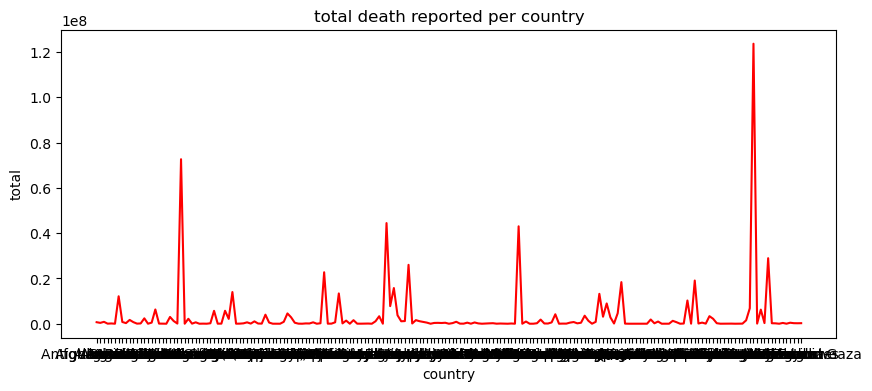

In [159]:
# total no of death reported per country upto the current date?

total_death=dfd_melt.groupby('Country/Region')['Death cases'].sum()
total_death=pd.DataFrame(total_death)
total_death

# plotting
plt.figure(figsize=(10,4))
plt.plot(total_death.index,total_death,color='r')
plt.title('total death reported per country')
plt.xlabel('country')
plt.ylabel('total')
 

In [174]:
# top 5 countries with heighest average daily deaths.
top=dfd_melt.groupby('Country/Region')['Death cases'].mean().sort_values(ascending=False)[0:5]

top

Country/Region
US        250234.906883
Brazil    147013.327935
India      89935.410931
Mexico     87057.647773
Italy      52633.382591
Name: Death cases, dtype: float64

,Death cases
Date,
2020-01-02,0.0
2020-01-03,1.0
2020-01-04,6653.0
2020-01-05,68144.0
2020-01-06,108616.0
...,...
2021-12-01,388001.0
2021-12-02,484494.0
2021-12-03,534234.0


<Axes: xlabel='Date'>

Text(0.5, 1.0, 'total deaths evolved overtime in us')

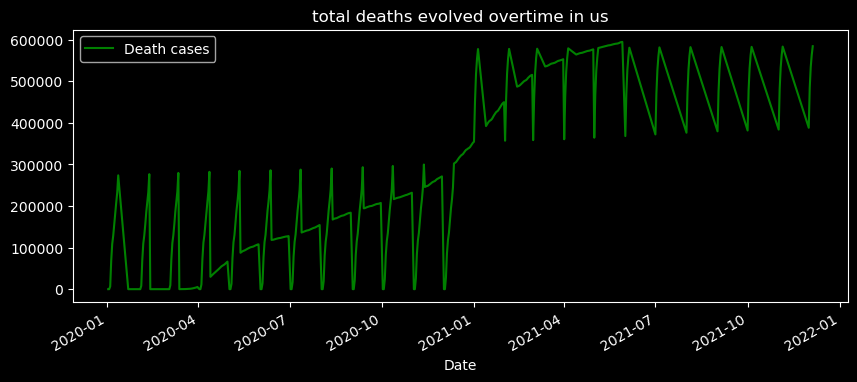

In [186]:
# how have the total deaths evolved overtime in us?

us=dfd_melt.loc[dfd_melt['Country/Region']=='US']
us_death=us.groupby('Date')['Death cases'].sum()
us_death=pd.DataFrame(us_death)
us_death

plt.style.use('dark_background')
us_death.plot.line(figsize=(10,4),color='g')
plt.title('total deaths evolved overtime in us')

In [182]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# data merging : combined data analysis

In [191]:
dfc_merge=dfc_melt.merge(dfd_melt[['Province/State','Country/Region','Date','Death cases']],on=['Province/State','Country/Region','Date'])
dfc_merge=dfc_merge.merge(dfr_melt[['Province/State','Country/Region','Date','Recovered cases']],on=['Province/State','Country/Region','Date'])
dfc_merge

,Province/State,Country/Region,Lat,Long,Date,Confirmed cases,Death cases,Recovered cases
0,Afghanistan,Afghanistan,33.939110,67.709953,2020-01-22,0,0.0,0.0
1,Albania,Albania,41.153300,20.168300,2020-01-22,0,0.0,0.0
2,Algeria,Algeria,28.033900,1.659600,2020-01-22,0,0.0,0.0
3,Andorra,Andorra,42.506300,1.521800,2020-01-22,0,0.0,0.0
4,Angola,Angola,-11.202700,17.873900,2020-01-22,0,0.0,0.0
...,...,...,...,...,...,...,...,...
128435,Vietnam,Vietnam,14.058324,108.277199,2021-05-29,6908,47.0,2896.0
128436,West Bank and Gaza,West Bank and Gaza,31.952200,35.233200,2021-05-29,307838,3492.0,300524.0
128437,Yemen,Yemen,15.552727,48.516388,2021-05-29,6731,1319.0,3399.0
128438,Zambia,Zambia,-13.133897,27.849332,2021-05-29,94751,1276.0,91594.0


In [198]:
# extract month nd year from date 

dfc_merge['Year month']=dfc_merge['Date'].dt.to_period('M')
dfc_merge['Year']=dfc_merge['Date'].dt.year

In [197]:
# analyse the monthly sum of comfirmed,death and recoveries to understand the progession of pandemic

monthly=dfc_merge.groupby('Year month')[['Confirmed cases','Death cases','Recovered cases']].sum()
monthly

,Confirmed cases,Death cases,Recovered cases
Year month,,,
2020-01,208705041,6365206.0,1.321229e+08
2020-02,212473410,6457695.0,1.341878e+08
2020-03,221438822,6830528.0,1.374615e+08
2020-04,262455429,9824213.0,1.496489e+08
2020-05,316540148,12903953.0,1.769233e+08
2020-06,382455818,14951880.0,2.201663e+08
2020-07,511898356,18347069.0,3.059199e+08
2020-08,664668513,21856181.0,4.252536e+08
2020-09,793508282,24106143.0,5.324290e+08


In [208]:
# find top 3 countries with heighest average death rates throughout 2020.

year=dfc_merge.loc[dfc_merge['Year']==2020]

country=year.groupby('Country/Region')[['Confirmed cases','Death cases']].mean()
country['avg death rate']=country['Death cases']/country['Confirmed cases']
top_3=country.sort_values(by='avg death rate',ascending=False)[0:3]
top_3

,Confirmed cases,Death cases,avg death rate
Country/Region,,,
Yemen,1108.133333,315.779710,0.284965
MS Zaandam,7.197101,1.594203,0.221506
Mexico,431948.443478,43529.585507,0.100775


,Recovered cases,Death cases
Date,,
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,50.0,5.0
2020-01-05,2382.0,116.0
2020-01-06,17291.0,705.0
...,...,...
2021-12-01,1019123.0,34334.0
2021-12-02,1383626.0,47670.0
2021-12-03,1449654.0,51179.0


<Axes: xlabel='Date'>

Text(0.5, 1.0, 'total recovered and deaths in south africa')

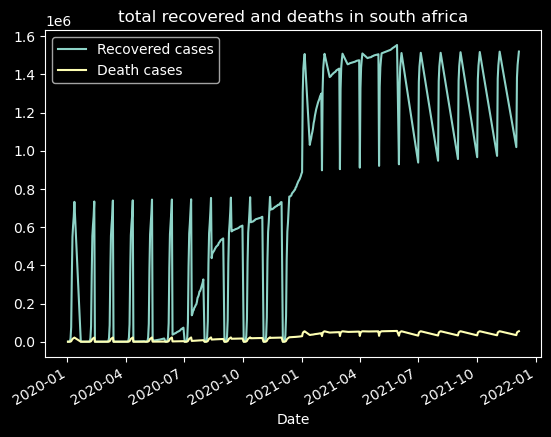

In [213]:
# analyze total no of recovered and total deaths in south africa

south_africa=dfc_merge.loc[dfc_merge['Country/Region']=='South Africa']
recover_death=south_africa.groupby('Date')[['Recovered cases','Death cases']].sum()
recover_death

# plotting

recover_death.plot.line()
plt.title('total recovered and deaths in south africa')

In [ ]:
# analyze ratio of recoveries to confirmed cases for us on monthly basis.

Year month
2020-01    0.356591
2020-02    0.357766
2020-03    0.350569
2020-04    0.297692
2020-05    0.302140
2020-06    0.319727
2020-07    0.328080
2020-08    0.353495
2020-09    0.376939
2020-10    0.387379
2020-11    0.371003
2020-12    0.064041
2021-01    0.000000
2021-02    0.000000
2021-03    0.000000
2021-04    0.000000
2021-05    0.000000
2021-06    0.000000
2021-07    0.000000
2021-08    0.000000
2021-09    0.000000
2021-10    0.000000
2021-11    0.000000
2021-12    0.000000
Freq: M, dtype: float64

Period('2020-10', 'M')

<Axes: xlabel='Year month'>

Text(0.5, 1.0, 'monthly recovery ratio of us')

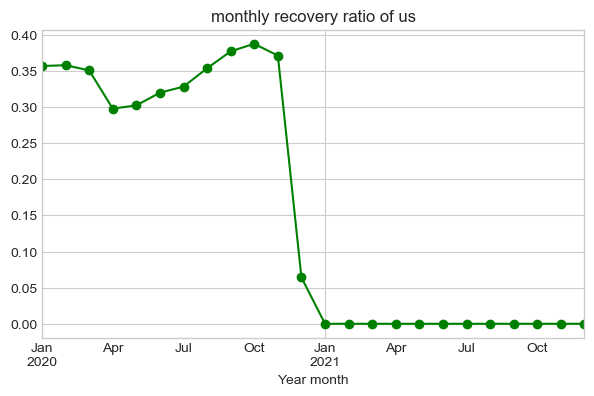

In [239]:
us=dfc_merge.loc[dfc_merge['Country/Region']=='US']
us_group=us.groupby('Year month')[['Confirmed cases','Recovered cases']].sum()
us_group_ratio=us_group['Recovered cases']/us_group['Confirmed cases']
us_group_ratio
# which month experienced the heighest recovery rate
us_group_ratio.idxmax()

# plotting
us_group_ratio.plot.line(figsize=(7,4),marker='o',color='g')
plt.title('monthly recovery ratio of us')
plt.style.use('seaborn-v0_8-whitegrid')